## Chest X-Ray Project

Implementing a Convolutional Neural Network using the **Keras library** in Python to classify chest X-Ray
images to detect pneumonia addressing the issues in training neural network in the field of Deep Learning

In [21]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [22]:
# Initialize the CNN
classifier = Sequential()
# also can use classifier = tf.keras.Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

# Compiling the CNN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Implementing a CNN architecture using 2 Convolutional layers and 2 Max Pooling layers.
From the code used, CNN architecture was implemented includes 2 convolutional layers, each with 32 filters of size 3x3, followed by 2 max pooling layers of size 2x2. The input shape is (64,64,3) and the activation function used in the convolutional layers is ReLU. The feature maps are then flattened and passed through 2 dense layers with 128 units and 1 unit respectively, with ReLU and sigmoid activation functions respectively. The model is optimized with Adam optimizer, and trained with binary cross entropy loss and accuracy metric.

In [34]:
# Fitting the CNN to the images
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('C:/Users/ETC/Desktop/chest_xray/chest_xray',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('C:/Users/ETC/Desktop/chest_xray/chest_xray',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5856 images belonging to 3 classes.
Found 5856 images belonging to 3 classes.


In [35]:
# fitting the classifier model to the training set and using the test set for validation during training
classifier.fit(training_set, epochs=25, validation_data=test_set)

Epoch 1/25
183/183 [==============================] - 295s 2s/step - loss: 0.3441 - accuracy: 0.8876 - val_loss: 0.3274 - val_accuracy: 0.8907
Epoch 2/25
183/183 [==============================] - 254s 1s/step - loss: 0.3350 - accuracy: 0.8907 - val_loss: 0.3234 - val_accuracy: 0.8907
Epoch 3/25
183/183 [==============================] - 240s 1s/step - loss: 0.3349 - accuracy: 0.8907 - val_loss: 0.3376 - val_accuracy: 0.8907
Epoch 4/25
183/183 [==============================] - 243s 1s/step - loss: 0.3248 - accuracy: 0.8907 - val_loss: 0.3198 - val_accuracy: 0.8907
Epoch 5/25
183/183 [==============================] - 252s 1s/step - loss: 0.3249 - accuracy: 0.8907 - val_loss: 0.3208 - val_accuracy: 0.8907
Epoch 6/25
183/183 [==============================] - 205s 1s/step - loss: 0.3197 - accuracy: 0.8907 - val_loss: 0.3142 - val_accuracy: 0.8907
Epoch 7/25
183/183 [==============================] - 202s 1s/step - loss: 0.3230 - accuracy: 0.8907 - val_loss: 0.3141 - val_accuracy: 0.8907

### Observing the training and validation loss values to identify the limitation in our training process. (Hint: how well does the model fit our dataset?) 
From our model, the training accuracy was 0.8907 and validation loss was 0.3047. We can infer that the model is performing well on the given dataset. The training accuracy indicates that the model can classify the training examples with a high degree of accuracy, and the low validation loss suggests that the model is not overfitting on the training data as the loss on the validation set is similar to the loss on the training set. To also gain a better understanding of the model's ability to with unseen data, it is important to compare its performance on the validation set to its performance on unseen data (test set).

In [36]:
# Evaluating the model's performance on the test set
test_loss, test_acc = classifier.evaluate(test_set)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

183/183 [==============================] - 92s 502ms/step - loss: 0.3145 - accuracy: 0.8907
Test loss: 0.31448420882225037
Test accuracy: 0.8907103538513184


In [37]:
# Making predictions on the test set
y_pred = classifier.predict(test_set)

183/183 [==============================] - 97s 526ms/step


In [38]:
# Converting the predicted probabilities to binary classes
y_pred = (y_pred > 0.5)

In [39]:
# Importing the confusion matrix and classification report libraries
from sklearn.metrics import confusion_matrix, classification_report

# Creating the confusion matrix
cm = confusion_matrix(test_set.classes, y_pred)
print(cm)

[[   0  624    0]
 [   0 5216    0]
 [   0   16    0]]


In [40]:
# Creating the classification report
cr = classification_report(test_set.classes, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       624
           1       0.89      1.00      0.94      5216
           2       0.00      0.00      0.00        16

    accuracy                           0.89      5856
   macro avg       0.30      0.33      0.31      5856
weighted avg       0.79      0.89      0.84      5856



C:\Users\ETC\Anaconda\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ETC\Anaconda\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ETC\Anaconda\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Plotting a confusion matrix to showcase your results on the test set. 

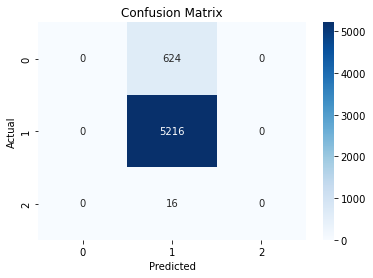

In [41]:
# Importing the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Briefly describe one way to fix our training process to improve results. 
Amongst other ways to fix our training process, one suggested way to improve the results of our training process is the use of “data augmentation” as this can help to prevent overfitting by providing the model with more diverse examples to learn from.

### Fixing our Models training dataset using data augumentation parameters

In [43]:
# Create data generator
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [44]:
# Prepare iterator
it = datagen.flow_from_directory('C:/Users/ETC/Desktop/chest_xray/chest_xray',
                                 target_size=(64, 64),
                                 batch_size=32,
                                 class_mode='binary')

Found 5856 images belonging to 3 classes.


In [45]:
# Fitting the model on the augmented train set, and evaluate on the test set
classifier.fit_generator(it, steps_per_epoch=len(it), epochs=25)

C:\Users\ETC\AppData\Local\Temp/ipykernel_16352/779790018.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(it, steps_per_epoch=len(it), epochs=25)


Epoch 1/25
183/183 [==============================] - 124s 678ms/step - loss: 0.3386 - accuracy: 0.8905
Epoch 2/25
183/183 [==============================] - 114s 621ms/step - loss: 0.3340 - accuracy: 0.8907
Epoch 3/25
183/183 [==============================] - 114s 623ms/step - loss: 0.3306 - accuracy: 0.8907
Epoch 4/25
183/183 [==============================] - 112s 610ms/step - loss: 0.3300 - accuracy: 0.8907
Epoch 5/25
183/183 [==============================] - 111s 605ms/step - loss: 0.3308 - accuracy: 0.8907
Epoch 6/25
183/183 [==============================] - 112s 612ms/step - loss: 0.3316 - accuracy: 0.8907
Epoch 7/25
183/183 [==============================] - 113s 614ms/step - loss: 0.3308 - accuracy: 0.8907
Epoch 8/25
183/183 [==============================] - 112s 611ms/step - loss: 0.3308 - accuracy: 0.8907
Epoch 9/25
183/183 [==============================] - 112s 614ms/step - loss: 0.3294 - accuracy: 0.8907
Epoch 10/25
183/183 [==============================] - 113s 618m

In [46]:
# Evaluating the model's performance on the test set
test_loss, test_acc = classifier.evaluate(test_set)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

183/183 [==============================] - 91s 496ms/step - loss: 0.3104 - accuracy: 0.8907
Test loss: 0.3104466199874878
Test accuracy: 0.8907103538513184


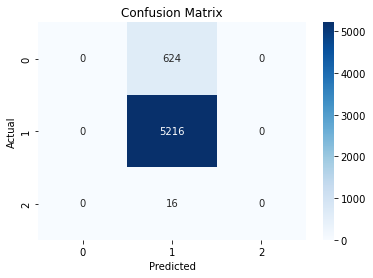

In [47]:
# Plotting the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Implementing the fix in our code to improve results
Upon implementation of the above to improve our models results, we observed that the accuracy was 0.8907 loss: 0.3285 . This suggests that the model seems to be performing well. Use of other techniques like regularizer and changing the parameters would help also the model in performing better